Iteration 1 completed in 225.43542790412903 seconds


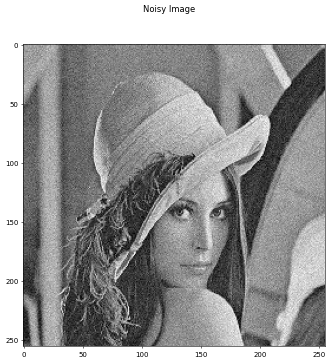

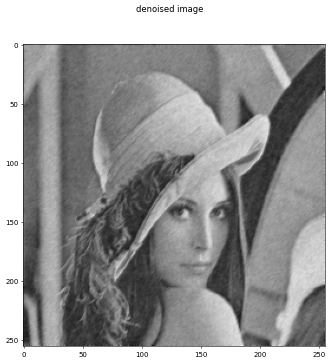

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from PIL import Image as im
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

class denoiser():
    
    def __init__(self, imagePath, beta = 1, sigma = 5, iterations = 1):
        
        self.image = cv2.imread(imagePath, 0)#greyscale image
        self.dimensions = self.image.shape
        self.iterations = iterations         #denoising iterations
        self.sigma = sigma                   #scaling parameter
        self.beta = beta                     #scaling parameter
        
    def display(self, image, title):
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig, ax = plt.subplots(figsize = (8, 8), dpi = 50)
        fig.suptitle(title)
        plt.imshow(image)
        
    def pot(self, pixel1, pixel2):
        
        return float((pixel1 - pixel2)) ** 2
    
    def process(self):
        
        self.display(self.image, title = "Noisy Image")
        NoisyIm = self.image
        height, width = self.dimensions
        for iter in range(self.iterations):
            st = time.time()
            for i in range(height-1):
                for j in range(width-1):
            # We work in 4-connexity here
                    xmin = 0
                    mini = float((NoisyIm[i][j]*NoisyIm[i][j]))/(2.0*self.sigma) + self.beta*(self.pot(NoisyIm[i][j-1],0)+self.pot(NoisyIm[i][j+1],0)+self.pot(NoisyIm[i-1][j], 0)+self.pot(NoisyIm[i+1][j], 0))

            #Every shade of gray is tested to find the a local minimum of the energy corresponding to a Gibbs distribution
                    for x in range(256):
                        proba = float(((NoisyIm[i][j]-x)*(NoisyIm[i][j]-x)))/(2.0*self.sigma) + self.beta*(self.pot(NoisyIm[i][j-1],x) + self.pot(NoisyIm[i][j+1],x) + self.pot(NoisyIm[i-1][j], x) + self.pot(NoisyIm[i+1][j], x))

                        if(mini>proba):
                            mini = proba
                            xmin = x
                    NoisyIm [i][j] = xmin

            cv2.imwrite("iter_" + str(iter+1) + "_denoised_" + image, NoisyIm)
            data = im.fromarray(NoisyIm)
            data = cv2.cvtColor(NoisyIm, cv2.COLOR_BGR2RGB)
            self.display(data, "denoised image")
            et = time.time()
            print(f"Iteration {iter + 1} completed in {et - st} seconds")
            
            
solution = denoiser(imagePath = './toDenoise.jpg')
solution.process()
        